<a href="https://colab.research.google.com/github/jeevanvishwa02/Competitions/blob/main/Travelers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

The data provided to you and your team consists of variables describing customers that asked for quotes. There are three datasets: at the policy, driver, and vehicle levels. Each row of the policy dataset corresponds to a single policy, which may be associated with multiple drivers and vehicles. Likewise, each row of the driver dataset represents a single driver, and each row of the vehicle dataset represents a single vehicle. It's easy to check that each driver and each vehicle are associated with just one policy. You may assume that all members on a policy live at the same address.


Your company was only able to convert a fraction of the policies found in this sample. The policy dataset also has a training and test split variable called split. Note that the conversion indicator (the response variable) is missing for policies in the test split. Your task is to build a model on the training data and apply your model to predict the conversion indicator for each policy in test data.


Drive Link -https://drive.google.com/drive/folders/0AB3G2nP2pGBzUk9PVA
Kaggle Link - https://www.kaggle.com/competitions/zamnrq1n2yz/overview

## Import modules, mount your Google Drive, read data
Set up your environment

In [7]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
pd.set_option('display.max_columns', None)

In [1]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data
# on the lefthand side, navigate to your data and copy the path
df_drivers = pd.read_csv('/content/drive/Shareddrives/Travelers/drivers.csv',low_memory=False)
df_policies = pd.read_csv('/content/drive/Shareddrives/Travelers/policies.csv',low_memory=False)
df_vehicles = pd.read_csv('/content/drive/Shareddrives/Travelers/vehicles.csv',low_memory=False)
#df = pd.read_excel('/content/drive/MyDrive/TAMU Competition/Training_sample.xlsx')

In [4]:
df_drivers.head()

,Unnamed: 0,policy_id,gender,living_status,age,safty_rating,high_education_ind
0,2,policy_2,M,own,44,85.0,0.0
1,3,policy_2,M,own,44,63.0,1.0
2,4,policy_3,M,own,65,56.0,1.0
3,7,policy_5,M,rent,60,74.0,1.0
4,8,policy_5,F,dependent,20,30.0,0.0


In [8]:
df_policies.head()

,Unnamed: 0,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,policy_id,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking
0,1,2015-01-28,Yes,Y,10465.0,NY,Bronx,15973623.0,"$5,153",Carrier_1,613.0,High,2.0,policy_87209,2,1,2,0,3,0.0,Train,home/driveway
1,2,2015-02-12,No,N,12801.0,NY,Warren,46978147.0,"$9,870",Carrier_4,576.0,Low,4.0,policy_89288,1,1,1,2,4,NaN,Test,unknown
2,3,2018-09-03,No,N,11548.0,NY,Nassau,32759856.0,"$3,090",Carrier_4,631.0,Medium,2.0,policy_91413,2,1,2,1,4,0.0,Train,unknown
3,4,2015-07-28,No,N,33141.0,FL,Miami-Dade,47310293.0,"$2,860",Carrier_7,573.0,Medium,3.0,policy_23460,1,2,3,0,5,NaN,Test,unknown
4,5,2016-05-18,No,N,14622.0,NY,Monroe,15675431.0,"$14,917",Carrier_3,602.0,Medium,4.0,policy_71845,2,0,1,2,3,0.0,Train,unknown


In [6]:
df_vehicles.head()

,Unnamed: 0,policy_id,car_no,ownership_type,color,age,make_model
0,6,policy_74571,1,leased,other,4.0,BMW : R1200CL
1,7,policy_74571,2,owned,blue,3.0,ACURA : TL
2,15,policy_1998,1,owned,gray,7.0,BMW : 750LI
3,29,policy_28085,1,owned,gray,4.0,MERCEDES-BENZ : G55 AMG
4,34,policy_64282,1,owned,black,4.0,BMW : 550I GT


### Drivers dataset transformation

In [14]:
df_drivers.head(6)

,Unnamed: 0,policy_id,gender,living_status,age,safty_rating,high_education_ind,avg_age
0,2,policy_2,M,own,44,85.0,0.0,44.0
1,3,policy_2,M,own,44,63.0,1.0,44.0
2,4,policy_3,M,own,65,56.0,1.0,65.0
3,7,policy_5,M,rent,60,74.0,1.0,32.0
4,8,policy_5,F,dependent,20,30.0,0.0,32.0
5,9,policy_5,F,dependent,16,29.0,0.0,32.0


In [19]:
df_drivers_cont = pd.get_dummies(df_drivers, columns=['gender','living_status'], drop_first=False)

In [20]:
df_drivers_cont.head()

,Unnamed: 0,policy_id,age,safty_rating,high_education_ind,avg_age,gender_F,gender_M,living_status_dependent,living_status_own,living_status_rent
0,2,policy_2,44,85.0,0.0,44.0,0,1,0,1,0
1,3,policy_2,44,63.0,1.0,44.0,0,1,0,1,0
2,4,policy_3,65,56.0,1.0,65.0,0,1,0,1,0
3,7,policy_5,60,74.0,1.0,32.0,0,1,0,0,1
4,8,policy_5,20,30.0,0.0,32.0,1,0,1,0,0


In [16]:
df_drivers['living_status'].value_counts()

dependent    39654
own          36526
rent         30064
Name: living_status, dtype: int64

Transformation of each column
1. Gender - check if policy has male or femal or both genders
2. Living Status
3. Average of age
4. Average of Safety Rating
5. Check if any one driver is highly educated

In [22]:
df_drivers_cont['avg_age']=df_drivers_cont.groupby('policy_id')['age'].transform('mean')
df_drivers_cont['avg_safty_rating']=df_drivers_cont.groupby('policy_id')['safty_rating'].transform('mean')
df_drivers_cont['num_of_higher_educators']=df_drivers_cont.groupby('policy_id')['high_education_ind'].transform('sum')
df_drivers_cont['num_of_females']=df_drivers_cont.groupby('policy_id')['gender_F'].transform('sum')
df_drivers_cont['num_of_males']=df_drivers_cont.groupby('policy_id')['gender_M'].transform('sum')
df_drivers_cont['num_of_dependents']=df_drivers_cont.groupby('policy_id')['living_status_dependent'].transform('sum')
df_drivers_cont['num_of_renters']=df_drivers_cont.groupby('policy_id')['living_status_rent'].transform('sum')
df_drivers_cont['num_of_owners']=df_drivers_cont.groupby('policy_id')['living_status_own'].transform('sum')
df_drivers_cont.head(6)

,Unnamed: 0,policy_id,age,safty_rating,high_education_ind,avg_age,gender_F,gender_M,living_status_dependent,living_status_own,living_status_rent,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners
0,2,policy_2,44,85.0,0.0,44.0,0,1,0,1,0,74.000000,1.0,0,2,0,0,2
1,3,policy_2,44,63.0,1.0,44.0,0,1,0,1,0,74.000000,1.0,0,2,0,0,2
2,4,policy_3,65,56.0,1.0,65.0,0,1,0,1,0,56.000000,1.0,0,1,0,0,1
3,7,policy_5,60,74.0,1.0,32.0,0,1,0,0,1,44.333333,1.0,2,1,2,1,0
4,8,policy_5,20,30.0,0.0,32.0,1,0,1,0,0,44.333333,1.0,2,1,2,1,0
5,9,policy_5,16,29.0,0.0,32.0,1,0,1,0,0,44.333333,1.0,2,1,2,1,0


References:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html

In [25]:
df_drivers_policy_level=df_drivers_cont[['policy_id','avg_age','avg_safty_rating','num_of_higher_educators','num_of_females','num_of_males','num_of_dependents','num_of_renters','num_of_owners']].drop_duplicates()

In [26]:
df_drivers_policy_level.count()

policy_id                  49162
avg_age                    49162
avg_safty_rating           49147
num_of_higher_educators    49162
num_of_females             49162
num_of_males               49162
num_of_dependents          49162
num_of_renters             49162
num_of_owners              49162
dtype: int64

In [27]:
df_drivers_policy_level.head()

,policy_id,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners
0,policy_2,44.0,74.000000,1.0,0,2,0,0,2
2,policy_3,65.0,56.000000,1.0,0,1,0,0,1
3,policy_5,32.0,44.333333,1.0,2,1,2,1,0
6,policy_6,31.0,73.333333,0.0,0,3,2,0,1
9,policy_11,50.0,92.000000,0.0,1,0,0,1,0


### Vehicle Dataset transformation

In [28]:
df_vehicles.head(6)

,Unnamed: 0,policy_id,car_no,ownership_type,color,age,make_model
0,6,policy_74571,1,leased,other,4.0,BMW : R1200CL
1,7,policy_74571,2,owned,blue,3.0,ACURA : TL
2,15,policy_1998,1,owned,gray,7.0,BMW : 750LI
3,29,policy_28085,1,owned,gray,4.0,MERCEDES-BENZ : G55 AMG
4,34,policy_64282,1,owned,black,4.0,BMW : 550I GT
5,35,policy_64282,2,loaned,black,6.0,MERCEDES-BENZ : CL65 AMG


In [29]:
df_vehicles.color.value_counts()

blue      24149
white     24144
black     24096
other     24059
silver    24004
gray      23873
red       23840
Name: color, dtype: int64

In [30]:
df_vehicles_cont = pd.get_dummies(df_vehicles, columns=['ownership_type'], drop_first=False)

In [31]:
df_vehicles_cont.head()

,Unnamed: 0,policy_id,car_no,color,age,make_model,ownership_type_leased,ownership_type_loaned,ownership_type_owned
0,6,policy_74571,1,other,4.0,BMW : R1200CL,1,0,0
1,7,policy_74571,2,blue,3.0,ACURA : TL,0,0,1
2,15,policy_1998,1,gray,7.0,BMW : 750LI,0,0,1
3,29,policy_28085,1,gray,4.0,MERCEDES-BENZ : G55 AMG,0,0,1
4,34,policy_64282,1,black,4.0,BMW : 550I GT,0,0,1


Transformation of each column
1. Number of cars
2. Ownership
3. Average of age


In [32]:
df_vehicles_cont['avg_cars_age']=df_vehicles_cont.groupby('policy_id')['age'].transform('mean')
df_vehicles_cont['num_of_cars']=df_vehicles_cont.groupby('policy_id')['car_no'].transform('count')
df_vehicles_cont['num_of_leased_cars']=df_vehicles_cont.groupby('policy_id')['ownership_type_leased'].transform('sum')
df_vehicles_cont['num_of_loaned_cars']=df_vehicles_cont.groupby('policy_id')['ownership_type_loaned'].transform('sum')
df_vehicles_cont['num_of_owned_cars']=df_vehicles_cont.groupby('policy_id')['ownership_type_owned'].transform('sum')
df_vehicles_cont.head(6)

,Unnamed: 0,policy_id,car_no,color,age,make_model,ownership_type_leased,ownership_type_loaned,ownership_type_owned,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars
0,6,policy_74571,1,other,4.0,BMW : R1200CL,1,0,0,3.5,2,1,0,1
1,7,policy_74571,2,blue,3.0,ACURA : TL,0,0,1,3.5,2,1,0,1
2,15,policy_1998,1,gray,7.0,BMW : 750LI,0,0,1,7.0,1,0,0,1
3,29,policy_28085,1,gray,4.0,MERCEDES-BENZ : G55 AMG,0,0,1,4.0,1,0,0,1
4,34,policy_64282,1,black,4.0,BMW : 550I GT,0,0,1,4.4,5,1,2,2
5,35,policy_64282,2,black,6.0,MERCEDES-BENZ : CL65 AMG,0,1,0,4.4,5,1,2,2


In [36]:
df_vehicles_policy_level=df_vehicles_cont[['policy_id','avg_cars_age','num_of_cars','num_of_leased_cars','num_of_loaned_cars','num_of_owned_cars']].drop_duplicates()

In [37]:
df_vehicles_policy_level.count()

policy_id             49162
avg_cars_age          49149
num_of_cars           49162
num_of_leased_cars    49162
num_of_loaned_cars    49162
num_of_owned_cars     49162
dtype: int64

In [38]:
df_vehicles_policy_level.head()

,policy_id,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars
0,policy_74571,3.5,2,1,0,1
2,policy_1998,7.0,1,0,0,1
3,policy_28085,4.0,1,0,0,1
4,policy_64282,4.4,5,1,2,2
9,policy_72540,4.5,4,0,2,2


### Merging three datasets

In [45]:
print(len(df_policies))
print(len(df_drivers_policy_level))
print(len(df_vehicles_policy_level))

49162
49162
49162


In [175]:
df_t1 = pd.merge(df_policies, df_drivers_policy_level, on="policy_id")
df_t2=pd.merge(df_t1, df_vehicles_policy_level, on="policy_id")
df_t2.head()

,Unnamed: 0,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,policy_id,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars
0,1,2015-01-28,Yes,Y,10465.0,NY,Bronx,15973623.0,"$5,153",Carrier_1,613.0,High,2.0,policy_87209,2,1,2,0,3,0.0,Train,home/driveway,49.5,74.0,1.0,1,1,0,2,0,5.25,4,0,2,2
1,2,2015-02-12,No,N,12801.0,NY,Warren,46978147.0,"$9,870",Carrier_4,576.0,Low,4.0,policy_89288,1,1,1,2,4,NaN,Test,unknown,56.0,62.0,1.0,0,1,0,1,0,2.75,4,1,1,2
2,3,2018-09-03,No,N,11548.0,NY,Nassau,32759856.0,"$3,090",Carrier_4,631.0,Medium,2.0,policy_91413,2,1,2,1,4,0.0,Train,unknown,49.0,70.0,1.0,1,1,0,2,0,7.00,4,0,2,2
3,4,2015-07-28,No,N,33141.0,FL,Miami-Dade,47310293.0,"$2,860",Carrier_7,573.0,Medium,3.0,policy_23460,1,2,3,0,5,NaN,Test,unknown,30.0,90.0,1.0,1,0,0,1,0,5.50,2,0,1,1
4,5,2016-05-18,No,N,14622.0,NY,Monroe,15675431.0,"$14,917",Carrier_3,602.0,Medium,4.0,policy_71845,2,0,1,2,3,0.0,Train,unknown,56.5,81.5,2.0,1,1,0,0,2,4.50,4,0,1,3


In [176]:
len(df_t2)

49162

In [177]:
df_t2.columns

Index(['Unnamed: 0', 'Quote_dt', 'discount', 'Home_policy_ind', 'zip',
       'state_id', 'county_name', 'Agent_cd', 'quoted_amt',
       'Prior_carrier_grp', 'credit_score', 'Cov_package_type', 'CAT_zone',
       'policy_id', 'number_drivers', 'num_loaned_veh', 'num_owned_veh',
       'num_leased_veh', 'total_number_veh', 'convert_ind', 'split',
       'primary_parking', 'avg_age', 'avg_safty_rating',
       'num_of_higher_educators', 'num_of_females', 'num_of_males',
       'num_of_dependents', 'num_of_renters', 'num_of_owners', 'avg_cars_age',
       'num_of_cars', 'num_of_leased_cars', 'num_of_loaned_cars',
       'num_of_owned_cars'],
      dtype='object')

In [178]:
df_t2.drop(columns=['Unnamed: 0'],inplace=True)
df_t2.head(2)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,policy_id,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars
0,2015-01-28,Yes,Y,10465.0,NY,Bronx,15973623.0,"$5,153",Carrier_1,613.0,High,2.0,policy_87209,2,1,2,0,3,0.0,Train,home/driveway,49.5,74.0,1.0,1,1,0,2,0,5.25,4,0,2,2
1,2015-02-12,No,N,12801.0,NY,Warren,46978147.0,"$9,870",Carrier_4,576.0,Low,4.0,policy_89288,1,1,1,2,4,NaN,Test,unknown,56.0,62.0,1.0,0,1,0,1,0,2.75,4,1,1,2


In [179]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49162 entries, 0 to 49161
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quote_dt                 49162 non-null  object 
 1   discount                 49162 non-null  object 
 2   Home_policy_ind          49162 non-null  object 
 3   zip                      48690 non-null  float64
 4   state_id                 49162 non-null  object 
 5   county_name              49162 non-null  object 
 6   Agent_cd                 43732 non-null  float64
 7   quoted_amt               49050 non-null  object 
 8   Prior_carrier_grp        44162 non-null  object 
 9   credit_score             48862 non-null  float64
 10  Cov_package_type         48392 non-null  object 
 11  CAT_zone                 48912 non-null  float64
 12  policy_id                49162 non-null  object 
 13  number_drivers           49162 non-null  int64  
 14  num_loaned_veh        

### Prepare the dataset - convert all catg into numeric before over sampling

In [180]:
df_t2.head(2)

,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,policy_id,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars
0,2015-01-28,Yes,Y,10465.0,NY,Bronx,15973623.0,"$5,153",Carrier_1,613.0,High,2.0,policy_87209,2,1,2,0,3,0.0,Train,home/driveway,49.5,74.0,1.0,1,1,0,2,0,5.25,4,0,2,2
1,2015-02-12,No,N,12801.0,NY,Warren,46978147.0,"$9,870",Carrier_4,576.0,Low,4.0,policy_89288,1,1,1,2,4,NaN,Test,unknown,56.0,62.0,1.0,0,1,0,1,0,2.75,4,1,1,2


In [181]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49162 entries, 0 to 49161
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quote_dt                 49162 non-null  object 
 1   discount                 49162 non-null  object 
 2   Home_policy_ind          49162 non-null  object 
 3   zip                      48690 non-null  float64
 4   state_id                 49162 non-null  object 
 5   county_name              49162 non-null  object 
 6   Agent_cd                 43732 non-null  float64
 7   quoted_amt               49050 non-null  object 
 8   Prior_carrier_grp        44162 non-null  object 
 9   credit_score             48862 non-null  float64
 10  Cov_package_type         48392 non-null  object 
 11  CAT_zone                 48912 non-null  float64
 12  policy_id                49162 non-null  object 
 13  number_drivers           49162 non-null  int64  
 14  num_loaned_veh        

In [182]:
import datetime
df_t2['quote_year']=pd.to_datetime(df_t2['Quote_dt'])
df_t2['quote_year'] = df_t2['quote_year'].dt.year
#df['quote_year']=df['quote_year'].strftime("%Y")
df_t2.head()

# https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,policy_id,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars,quote_year
0,2015-01-28,Yes,Y,10465.0,NY,Bronx,15973623.0,"$5,153",Carrier_1,613.0,High,2.0,policy_87209,2,1,2,0,3,0.0,Train,home/driveway,49.5,74.0,1.0,1,1,0,2,0,5.25,4,0,2,2,2015
1,2015-02-12,No,N,12801.0,NY,Warren,46978147.0,"$9,870",Carrier_4,576.0,Low,4.0,policy_89288,1,1,1,2,4,NaN,Test,unknown,56.0,62.0,1.0,0,1,0,1,0,2.75,4,1,1,2,2015
2,2018-09-03,No,N,11548.0,NY,Nassau,32759856.0,"$3,090",Carrier_4,631.0,Medium,2.0,policy_91413,2,1,2,1,4,0.0,Train,unknown,49.0,70.0,1.0,1,1,0,2,0,7.00,4,0,2,2,2018
3,2015-07-28,No,N,33141.0,FL,Miami-Dade,47310293.0,"$2,860",Carrier_7,573.0,Medium,3.0,policy_23460,1,2,3,0,5,NaN,Test,unknown,30.0,90.0,1.0,1,0,0,1,0,5.50,2,0,1,1,2015
4,2016-05-18,No,N,14622.0,NY,Monroe,15675431.0,"$14,917",Carrier_3,602.0,Medium,4.0,policy_71845,2,0,1,2,3,0.0,Train,unknown,56.5,81.5,2.0,1,1,0,0,2,4.50,4,0,1,3,2016


In [183]:
df_t2.columns

Index(['Quote_dt', 'discount', 'Home_policy_ind', 'zip', 'state_id',
       'county_name', 'Agent_cd', 'quoted_amt', 'Prior_carrier_grp',
       'credit_score', 'Cov_package_type', 'CAT_zone', 'policy_id',
       'number_drivers', 'num_loaned_veh', 'num_owned_veh', 'num_leased_veh',
       'total_number_veh', 'convert_ind', 'split', 'primary_parking',
       'avg_age', 'avg_safty_rating', 'num_of_higher_educators',
       'num_of_females', 'num_of_males', 'num_of_dependents', 'num_of_renters',
       'num_of_owners', 'avg_cars_age', 'num_of_cars', 'num_of_leased_cars',
       'num_of_loaned_cars', 'num_of_owned_cars', 'quote_year'],
      dtype='object')

In [184]:
df_t2.drop(columns=['Quote_dt','zip','county_name','Agent_cd','policy_id','primary_parking'],inplace=True)

In [185]:
df_t2.head(2)

,discount,Home_policy_ind,state_id,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars,quote_year
0,Yes,Y,NY,"$5,153",Carrier_1,613.0,High,2.0,2,1,2,0,3,0.0,Train,49.5,74.0,1.0,1,1,0,2,0,5.25,4,0,2,2,2015
1,No,N,NY,"$9,870",Carrier_4,576.0,Low,4.0,1,1,1,2,4,NaN,Test,56.0,62.0,1.0,0,1,0,1,0,2.75,4,1,1,2,2015


In [186]:
# Convert quoted amt to a continuous variable
df_t2['quoted_amt'] = df_t2['quoted_amt'].str.replace('$','')
df_t2['quoted_amt'] = df_t2['quoted_amt'].str.replace(',','')
df_t2['quoted_amt']=pd.to_numeric(df_t2['quoted_amt']) 
df_t2.head(2)

# https://datatofish.com/replace-character-pandas-dataframe/
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,discount,Home_policy_ind,state_id,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,avg_age,avg_safty_rating,num_of_higher_educators,num_of_females,num_of_males,num_of_dependents,num_of_renters,num_of_owners,avg_cars_age,num_of_cars,num_of_leased_cars,num_of_loaned_cars,num_of_owned_cars,quote_year
0,Yes,Y,NY,5153.0,Carrier_1,613.0,High,2.0,2,1,2,0,3,0.0,Train,49.5,74.0,1.0,1,1,0,2,0,5.25,4,0,2,2,2015
1,No,N,NY,9870.0,Carrier_4,576.0,Low,4.0,1,1,1,2,4,NaN,Test,56.0,62.0,1.0,0,1,0,1,0,2.75,4,1,1,2,2015


In [187]:
df_copy=df_t2.copy()

## Data Cleaning

In [188]:
df_t2.isna().sum()

discount                       0
Home_policy_ind                0
state_id                       0
quoted_amt                   112
Prior_carrier_grp           5000
credit_score                 300
Cov_package_type             770
CAT_zone                     250
number_drivers                 0
num_loaned_veh                 0
num_owned_veh                  0
num_leased_veh                 0
total_number_veh               0
convert_ind                12291
split                          0
avg_age                        0
avg_safty_rating              15
num_of_higher_educators        0
num_of_females                 0
num_of_males                   0
num_of_dependents              0
num_of_renters                 0
num_of_owners                  0
avg_cars_age                  13
num_of_cars                    0
num_of_leased_cars             0
num_of_loaned_cars             0
num_of_owned_cars              0
quote_year                     0
dtype: int64

In [189]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49162 entries, 0 to 49161
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   discount                 49162 non-null  object 
 1   Home_policy_ind          49162 non-null  object 
 2   state_id                 49162 non-null  object 
 3   quoted_amt               49050 non-null  float64
 4   Prior_carrier_grp        44162 non-null  object 
 5   credit_score             48862 non-null  float64
 6   Cov_package_type         48392 non-null  object 
 7   CAT_zone                 48912 non-null  float64
 8   number_drivers           49162 non-null  int64  
 9   num_loaned_veh           49162 non-null  int64  
 10  num_owned_veh            49162 non-null  int64  
 11  num_leased_veh           49162 non-null  int64  
 12  total_number_veh         49162 non-null  int64  
 13  convert_ind              36871 non-null  float64
 14  split                 

In [190]:
cont_col_list=df_t2.describe().columns
cont_col_list

Index(['quoted_amt', 'credit_score', 'CAT_zone', 'number_drivers',
       'num_loaned_veh', 'num_owned_veh', 'num_leased_veh', 'total_number_veh',
       'convert_ind', 'avg_age', 'avg_safty_rating', 'num_of_higher_educators',
       'num_of_females', 'num_of_males', 'num_of_dependents', 'num_of_renters',
       'num_of_owners', 'avg_cars_age', 'num_of_cars', 'num_of_leased_cars',
       'num_of_loaned_cars', 'num_of_owned_cars', 'quote_year'],
      dtype='object')

In [191]:
#Step 1 -Replace NULLs with median for other variables
for i in df_t2.describe().columns:
  if i!='convert_ind':
    df_t2[i].fillna(df_t2[i].median(),inplace=True)    

In [192]:
df_t2.isna().sum()

discount                       0
Home_policy_ind                0
state_id                       0
quoted_amt                     0
Prior_carrier_grp           5000
credit_score                   0
Cov_package_type             770
CAT_zone                       0
number_drivers                 0
num_loaned_veh                 0
num_owned_veh                  0
num_leased_veh                 0
total_number_veh               0
convert_ind                12291
split                          0
avg_age                        0
avg_safty_rating               0
num_of_higher_educators        0
num_of_females                 0
num_of_males                   0
num_of_dependents              0
num_of_renters                 0
num_of_owners                  0
avg_cars_age                   0
num_of_cars                    0
num_of_leased_cars             0
num_of_loaned_cars             0
num_of_owned_cars              0
quote_year                     0
dtype: int64

In [193]:
# Check for NULLs again
# All these columsn should be categorical variables 
cnt=0
null_catg_cols=[]
for i in df_t2.columns:
  if(df_t2[i].isnull().sum().sum()>0):
    print("Column",i,df_t2[i].isnull().sum().sum())
    null_catg_cols.append(i)
    cnt=cnt+1
print("Number of columns with nulls",cnt)
null_catg_cols

Column Prior_carrier_grp 5000
Column Cov_package_type 770
Column convert_ind 12291
Number of columns with nulls 3


['Prior_carrier_grp', 'Cov_package_type', 'convert_ind']

In [194]:
#Step 3 - For categorical variables, replace NULLS with Unknown
for i in null_catg_cols:
  if i!='convert_ind':
    df_t2[i].fillna('Unknown',inplace=True)

In [195]:
df_t2.isna().sum()

discount                       0
Home_policy_ind                0
state_id                       0
quoted_amt                     0
Prior_carrier_grp              0
credit_score                   0
Cov_package_type               0
CAT_zone                       0
number_drivers                 0
num_loaned_veh                 0
num_owned_veh                  0
num_leased_veh                 0
total_number_veh               0
convert_ind                12291
split                          0
avg_age                        0
avg_safty_rating               0
num_of_higher_educators        0
num_of_females                 0
num_of_males                   0
num_of_dependents              0
num_of_renters                 0
num_of_owners                  0
avg_cars_age                   0
num_of_cars                    0
num_of_leased_cars             0
num_of_loaned_cars             0
num_of_owned_cars              0
quote_year                     0
dtype: int64

In [196]:
#Train dataset
df=df_t2[df_t2['split']=='Train']

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36871 entries, 0 to 49161
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   discount                 36871 non-null  object 
 1   Home_policy_ind          36871 non-null  object 
 2   state_id                 36871 non-null  object 
 3   quoted_amt               36871 non-null  float64
 4   Prior_carrier_grp        36871 non-null  object 
 5   credit_score             36871 non-null  float64
 6   Cov_package_type         36871 non-null  object 
 7   CAT_zone                 36871 non-null  float64
 8   number_drivers           36871 non-null  int64  
 9   num_loaned_veh           36871 non-null  int64  
 10  num_owned_veh            36871 non-null  int64  
 11  num_leased_veh           36871 non-null  int64  
 12  total_number_veh         36871 non-null  int64  
 13  convert_ind              36871 non-null  float64
 14  split                 

In [198]:
#create counts of df for plotting categorical variables using Numpy
convert_ind_class = np.unique(df['convert_ind'], return_counts=True)
print('target_class = {}\n'.format(convert_ind_class))

target_class = (array([0., 1.]), array([32751,  4120]))



In [199]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color': 'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

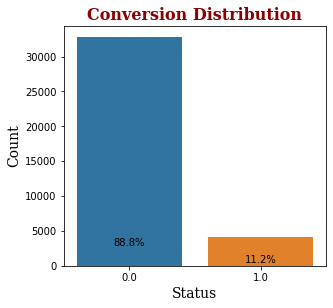

In [200]:
# Display a frequency distribution for target_class
fig = plt.figure(figsize=[16,15]); # Define figure size and store it in a variable
ax1 = fig.add_subplot(3, 3, 2);    #Use subplot function to create a plot of the size defined
sns.barplot(x=list(convert_ind_class[0]), y=list(convert_ind_class[1]), ax=ax1 ); # Add x labels for bar plot from array defined above. Similarly for y-axis. ax defines which plot the bar should return to
ax1.text(0, 2800, '{}%' .format(str(round(convert_ind_class[1][0]/sum(convert_ind_class[1])*100,1))),  horizontalalignment='center') # Add the text and define where it has to be added (0,2800 defines x and y positions for the text)
ax1.text(1, 500, '{}%' .format(str(round(convert_ind_class[1][1]/sum(convert_ind_class[1])*100,1))),  horizontalalignment='center')  # Add the text
ax1.set_title('Conversion Distribution', fontdict=axtitle_dict); # Set the title
ax1.set_xlabel('Status', fontdict=axlab_dict);  # Set the xlabel
ax1.set_ylabel('Count', fontdict=axlab_dict);         # Set the ylabel
#ax1.bar_label(ax1.containers[0])
plt.show()

11% of customers are converted after sharing the quote

## Data Encoding

In [201]:
df2 = pd.get_dummies(df, columns=['discount','Home_policy_ind','state_id','Prior_carrier_grp','Cov_package_type','CAT_zone','quote_year'], drop_first=True)

In [202]:
df2.drop(columns=['split'],inplace=True)

In [203]:
y=df2['convert_ind']
X=df2.drop(columns=['convert_ind'])

## Variable Importance

**Over Sampling**

Over sample the dataset and calculate the variable importance

In [204]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [205]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X, y)
# Check the number of records after over sampling
print(sorted(Counter(y).items()))
print(sorted(Counter(y_train_ros).items()))

[(0.0, 32751), (1.0, 4120)]
[(0.0, 32751), (1.0, 32751)]


**XG Boost**

In [206]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot


In [207]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train_ros, y_train_ros)
# feature importance
print(model.feature_importances_)


[0.04277518 0.01770472 0.03297631 0.01068539 0.01348583 0.01085227
 0.01416943 0.0599832  0.01272551 0.02805821 0.01549199 0.
 0.06593622 0.         0.01822928 0.01506022 0.02251414 0.01394928
 0.01326057 0.02483498 0.02947227 0.         0.01257369 0.01683642
 0.01331202 0.         0.01630456 0.03858921 0.         0.01901721
 0.02242728 0.         0.01471601 0.02187706 0.02379704 0.03331981
 0.01036236 0.         0.05065196 0.03481837 0.         0.017453
 0.01003259 0.05001042 0.05664542 0.02697572 0.02090635 0.02720852]


In [208]:
# plot

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

cols=np.array(X.columns)[sorted_idx]
df_features=pd.DataFrame()

df_features['sorted_idx']=sorted_idx
df_features['cols']=cols
df_features['score']=feature_importance[sorted_idx]

In [209]:
df_features.to_csv('feature_importance.csv')

**SHAP Explainer**

In [105]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.3 MB/s 


In [210]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(np.ascontiguousarray(X))
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
# fig = plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
# plt.title('SHAP Importance')

cols=np.array(X.columns)[sorted_idx]
df_shap=pd.DataFrame()
df_shap['sorted_idx']=sorted_idx
df_shap['col']=cols
df_shap['shap_importance']=shap_importance

In [211]:
df_shap.to_csv('df_shap_values.csv')

Use the XG Boost Feature importance values and SHAP values to relate and finalize the list of variables

**Final List of Variables**

In [212]:
var_list=['num_of_dependents','Cov_package_type_Medium','avg_age','Cov_package_type_Low','CAT_zone_5.0','CAT_zone_4.0',
 'quoted_amt','state_id_NY','discount_Yes','quote_year_2018','number_drivers','Prior_carrier_grp_Carrier_8',
 'num_of_higher_educators','Prior_carrier_grp_Carrier_3','quote_year_2016','num_of_owned_cars','num_of_cars',
 'quote_year_2017','Prior_carrier_grp_Carrier_6','Prior_carrier_grp_Carrier_7','num_leased_veh',
 'Prior_carrier_grp_Carrier_4','Prior_carrier_grp_Carrier_5','state_id_CT','num_of_owners','num_of_renters',
 'Prior_carrier_grp_Other','state_id_NJ','state_id_WI','num_owned_veh','credit_score','state_id_GA','convert_ind']

In [213]:
final_df=df2[var_list]

In [214]:
final_df.shape

(36871, 33)

In [215]:
final_df2=final_df.copy()

In [216]:
final_df['convert_ind'].value_counts()/len(final_df)

0.0    0.888259
1.0    0.111741
Name: convert_ind, dtype: float64

In [217]:
y=final_df['convert_ind']
X=final_df.drop(columns=['convert_ind'])


## Data Split

Split the dataset into Train and Test

In [218]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [219]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The test dataset has {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 29496
The number of records in the test dataset is 7375
The training dataset has 26145 records for the majority class and 3351 records for the minority class.
The test dataset has 6606 records for the majority class and 769 records for the minority class.


**Over sampling** 

In [220]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [221]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y).items()))
print(sorted(Counter(y_train_ros).items()))

[(0.0, 32751), (1.0, 4120)]
[(0.0, 26145), (1.0, 26145)]


## Data Modeling

### Standardizing data

In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [223]:
sc = StandardScaler()
sc.fit(X_train_ros)
X_train_std = sc.transform(X_train_ros)
X_test_std = sc.transform(X_test)

### Evaluate Model Function

In [224]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Baseline Model - Random Forest

No oversampling

In [225]:
# Train the random forest model , below results are without oversampling
brf = RandomForestClassifier()
baseline_model = brf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
#print(classification_report(y_test, baseline_prediction))

In [226]:
#Evaluate the Model
brf_eval=evaluate_model(brf, X_test_std, y_test)

# Print result
print('Accuracy:', brf_eval['acc'])
print('Precision for Housing Insecurity:', brf_eval['prec'])
print('Recall for Housing Insecurity:', brf_eval['rec'])   #For 1
print('F1 Score:', brf_eval['f1'])
print('Cohens Kappa Score:', brf_eval['kappa'])
print('Area Under Curve:', brf_eval['auc'])
print('Confusion Matrix:\n', brf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


Accuracy: 0.895728813559322
Precision for Housing Insecurity: 0.0
Recall for Housing Insecurity: 0.0
F1 Score: 0.0
Cohens Kappa Score: 0.0
Area Under Curve: 0.5987061256130396
Confusion Matrix:
 [[6606    0]
 [ 769    0]]


### Random Forest

Using oversampling

In [227]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf_ros = rf.fit(X_train_std, y_train_ros)
rf_ros_prediction = rf_ros.predict(X_test)
# Check the model performance
#print(classification_report(y_test, rf_ros_prediction))

X has feature names, but RandomForestClassifier was fitted without feature names


In [228]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Housing Insecurity:', rf_eval['prec'])
print('Recall for Housing Insecurity:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.8938305084745762
Precision for Housing Insecurity: 0.29411764705882354
Recall for Housing Insecurity: 0.013003901170351105
F1 Score: 0.024906600249066
Cohens Kappa Score: 0.016219882235150362
Area Under Curve: 0.65990969709926
Confusion Matrix:
 [[6582   24]
 [ 759   10]]


### Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train_ros)

LogisticRegression()

In [230]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Housing Insecurity:', lr_eval['prec'])
print('Recall for Housing Insecurity:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.5932203389830508
Precision for Housing Insecurity: 0.1491034916640453
Recall for Housing Insecurity: 0.6163849154746424
F1 Score: 0.24012158054711247
Cohens Kappa Score: 0.08677016632298973
Area Under Curve: 0.6462543213463585
Confusion Matrix:
 [[3901 2705]
 [ 295  474]]


In [231]:

print('Recall score is', recall_score(y_test, lr.predict(X_test_std), average='micro'))
print('Precision score is',precision_score(y_test, lr.predict(X_test_std), average='macro'))

Recall score is 0.5932203389830508
Precision score is 0.5393992196165793


In [232]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

         0.0       0.93      0.59      0.72      6606
         1.0       0.15      0.62      0.24       769

    accuracy                           0.59      7375
   macro avg       0.54      0.60      0.48      7375
weighted avg       0.85      0.59      0.67      7375



### Decision Tree

In [233]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train_ros)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [234]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Housing Insecurity:', round(dt_eval['prec'],2))
print('Recall for Housing Insecurity:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.544
Precision for Housing Insecurity: 0.14
Recall for Housing Insecurity: 0.63
F1 Score: 0.22
Cohens Kappa Score: 0.06
Area Under Curve: 0.59
Confusion Matrix:
 [[3527 3079]
 [ 284  485]]


In [235]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

         0.0       0.93      0.53      0.68      6606
         1.0       0.14      0.63      0.22       769

    accuracy                           0.54      7375
   macro avg       0.53      0.58      0.45      7375
weighted avg       0.84      0.54      0.63      7375



### KNN

In [236]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train_ros)

KNeighborsClassifier(n_neighbors=7)

In [237]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Housing Insecurity:', round(knn_eval['prec'],2))
print('Recall for Housing Insecurity:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.632
Precision for Housing Insecurity: 0.13
Recall for Housing Insecurity: 0.46
F1 Score: 0.21
Cohens Kappa Score: 0.05
Area Under Curve: 0.58
Confusion Matrix:
 [[4303 2303]
 [ 414  355]]


### XG Boost

In [238]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train_ros)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [239]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Housing Insecurity:', round(xg_eval['prec'],2))
print('Recall for Housing Insecurity:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.627
Precision for Housing Insecurity: 0.16
Recall for Housing Insecurity: 0.62
F1 Score: 0.26
Cohens Kappa Score: 0.11
Area Under Curve: 0.68
Confusion Matrix:
 [[4146 2460]
 [ 292  477]]


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


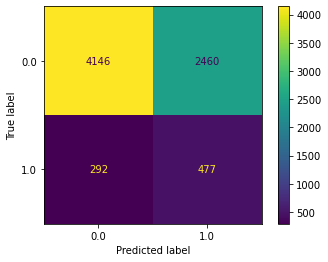

In [240]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg, X_test_std, y_test) 

In [241]:
print("Sensitivity of above model",260/(260+147))

Sensitivity of above model 0.6388206388206388


In [242]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_importance)

In [243]:
features =X_test.columns

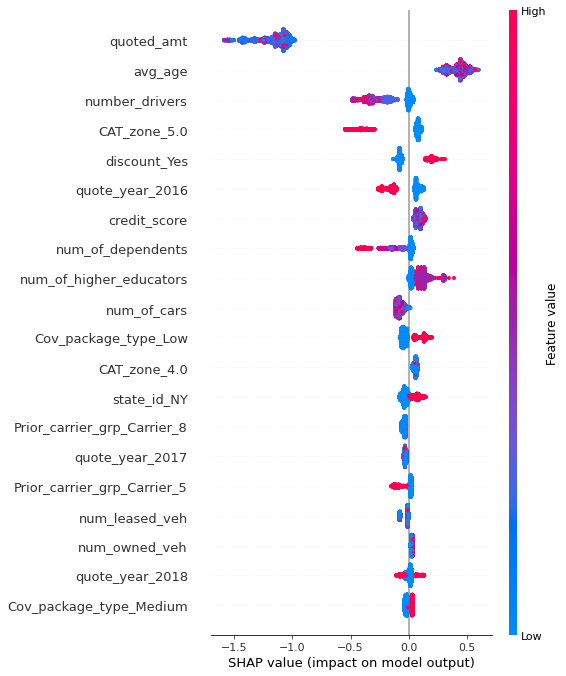

In [244]:
shap.summary_plot(shap_values, X_importance,feature_names=features)

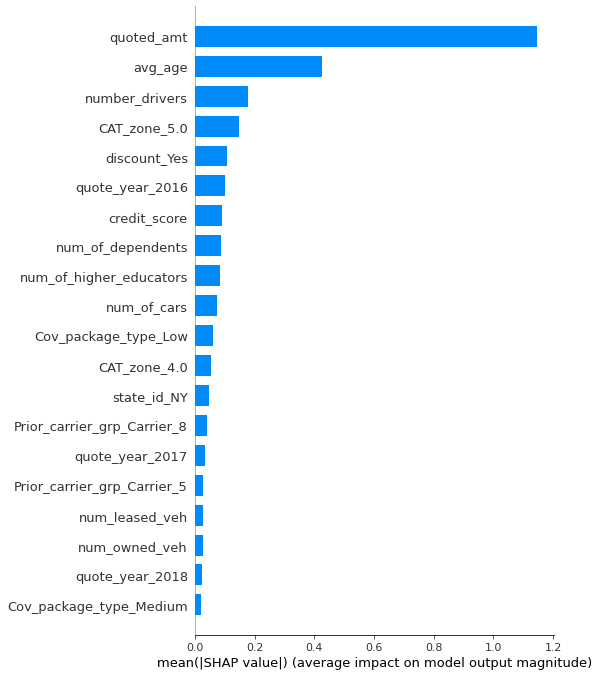

In [245]:
shap.summary_plot(shap_values, X_importance, plot_type='bar',feature_names=features)

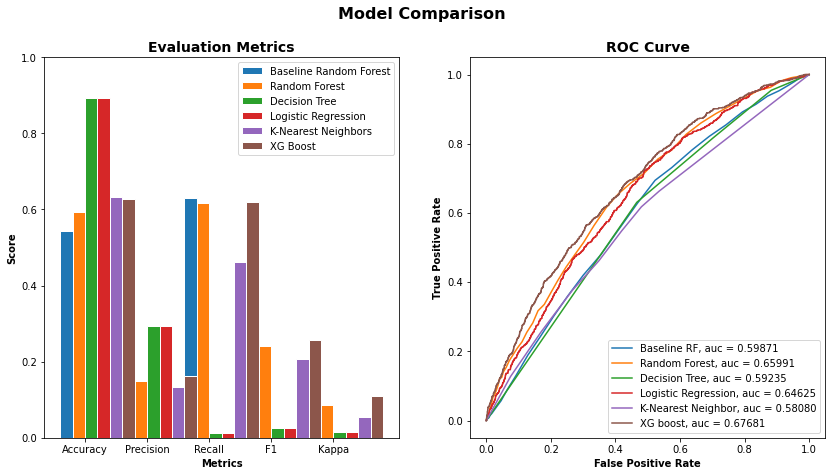

In [247]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Baseline Random Forest')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r4, rf_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [248]:
def plot_lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

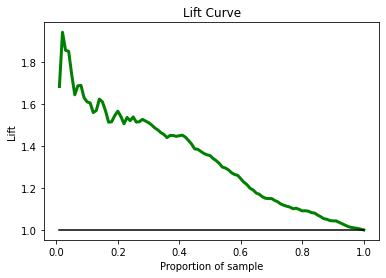

In [249]:
plot_lift_curve(y_test, lr.predict(X_test_std),)

## Scoring on Test Dataset

In [250]:
score_df_raw=df_t2[df_t2['split']=='Test']

In [251]:
score_df = pd.get_dummies(score_df_raw, columns=['discount','Home_policy_ind','state_id','Prior_carrier_grp','Cov_package_type','CAT_zone','quote_year'], drop_first=True)

In [252]:
score_df.drop(columns=['split'],inplace=True)

In [257]:
y=score_df['convert_ind']
X=score_df.drop(columns=['convert_ind'])

In [261]:
X_train.columns

Index(['num_of_dependents', 'Cov_package_type_Medium', 'avg_age',
       'Cov_package_type_Low', 'CAT_zone_5.0', 'CAT_zone_4.0', 'quoted_amt',
       'state_id_NY', 'discount_Yes', 'quote_year_2018', 'number_drivers',
       'Prior_carrier_grp_Carrier_8', 'num_of_higher_educators',
       'Prior_carrier_grp_Carrier_3', 'quote_year_2016', 'num_of_owned_cars',
       'num_of_cars', 'quote_year_2017', 'Prior_carrier_grp_Carrier_6',
       'Prior_carrier_grp_Carrier_7', 'num_leased_veh',
       'Prior_carrier_grp_Carrier_4', 'Prior_carrier_grp_Carrier_5',
       'state_id_CT', 'num_of_owners', 'num_of_renters',
       'Prior_carrier_grp_Other', 'state_id_NJ', 'state_id_WI',
       'num_owned_veh', 'credit_score', 'state_id_GA'],
      dtype='object')

In [263]:
sc = StandardScaler()
sc.fit(X[X_train.columns])
X_score_std = sc.transform(X[X_train.columns])

In [264]:
#holdout_pred = lr.predict(score_df_std)
holdout_pred_prob = xg.predict_proba(X_score_std)[::,1]

In [265]:
#holdout_pred = lr.predict(score_df_std)
print(holdout_pred_prob)

[0.3703884  0.4672528  0.19099799 ... 0.3866187  0.57520247 0.33511168]


In [266]:
df_submission_lb=score_df_raw.copy()

In [267]:
df_submission_lb['score']=holdout_pred_prob

In [268]:
df_submission_lb.to_csv('submission_1.csv')

## Next Steps

### Dense Neural Network

In [ ]:

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(180,input_shape=(X_train_std.shape[1],),activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               16200     
                                                                 
 dense_1 (Dense)             (None, 90)                16290     
                                                                 
 dense_2 (Dense)             (None, 30)                2730      
                                                                 
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 35,477
Trainable params: 35,477
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# compile the model (Telling how to run based on cost function optimizer and which variable to check)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train_std,
                    y_train_ros,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
6648/6648 [==============================] - 18s 3ms/step - loss: 0.5250 - accuracy: 0.7420 - val_loss: 0.4037 - val_accuracy: 0.8633
Epoch 2/100000
6648/6648 [==============================] - 20s 3ms/step - loss: 0.3457 - accuracy: 0.8552 - val_loss: 0.3421 - val_accuracy: 0.9010
Epoch 3/100000
6648/6648 [==============================] - 20s 3ms/step - loss: 0.2603 - accuracy: 0.9000 - val_loss: 0.2884 - val_accuracy: 0.9274
Epoch 4/100000
6648/6648 [==============================] - 19s 3ms/step - loss: 0.2215 - accuracy: 0.9176 - val_loss: 0.4391 - val_accuracy: 0.8511
Epoch 5/100000
6648/6648 [==============================] - 15s 2ms/step - loss: 0.2006 - accuracy: 0.9297 - val_loss: 0.2855 - val_accuracy: 0.9421
Epoch 6/100000
6648/6648 [==============================] - 15s 2ms/step - loss: 0.1840 - accuracy: 0.9365 - val_loss: 0.0820 - val_accuracy: 0.9893
Epoch 7/100000
6648/6648 [==============================] - 15s 2ms/step - loss: 0.1711 - accuracy: 0.9422

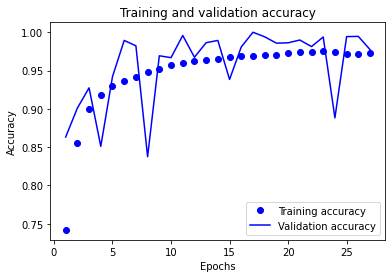

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

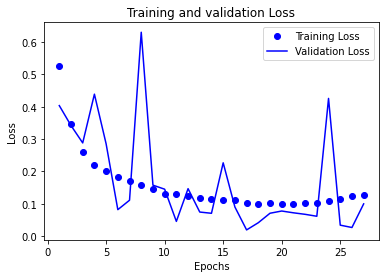

In [ ]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#Import confusion matrix related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# check model performance
preds = np.round(model.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

302/302 [==============================] - 0s 1ms/step


array([[  50, 9203],
       [   3,  404]])